In [1]:
import pandas as pd
from urllib import request
from matplotlib import pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm.notebook import tqdm_notebook

In [2]:
request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x20aacf0e760>)

In [3]:
train_data = pd.read_table('ratings.txt')

In [4]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
train_data["label"].value_counts()

1    100000
0    100000
Name: label, dtype: int64

In [6]:
train_data.loc[train_data["label"]==0].head()

,id,document,label
100000,6826470,이런영화로 관객들한테 돈벌고싶소?,0
100001,6239594,작품 선구안이 없다는게 배우 김태희의 최대 약점.,0
100002,8946612,사극?? 로멘스?? 퓨젼??,0
100003,4800899,ㅋㅋㅋㅋ엿국니네가그렇지므ㅝ 이건뭐 영화도아니고,0
100004,5927640,완죤유치하고 못봐주겠네...,0


In [7]:
train_data.loc[train_data["label"]==1].head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [8]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [9]:
train_data.dropna(how="any", inplace=True)
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [10]:
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
# train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)

In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm_notebook(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)


  0%|          | 0/199992 [00:00<?, ?it/s]

In [12]:
tokenized_data[:3]

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


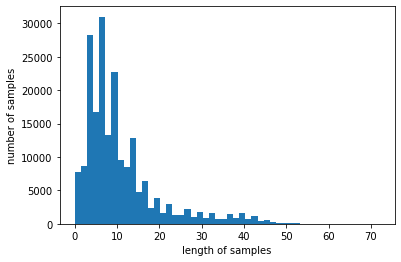

In [13]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [14]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = -1, sg = 0)

In [15]:
model.wv.vectors.shape

(16477, 100)

In [16]:
print(model.wv.most_similar("최민식"))

[('귀인', 0.3847578465938568), ('달래다', 0.3620937764644623), ('개똥', 0.3409345746040344), ('찌찌', 0.3342757225036621), ('교도소', 0.33309608697891235), ('천배', 0.32853901386260986), ('미나토', 0.32679852843284607), ('함', 0.32325324416160583), ('맥과이어', 0.31777626276016235), ('장용', 0.317522794008255)]


In [17]:
print(model.wv.most_similar("히어로"))

[('이고', 0.38868826627731323), ('하지원', 0.3820679485797882), ('이랑', 0.3792525827884674), ('시야', 0.36682191491127014), ('몸짱', 0.36338135600090027), ('초월', 0.3547590672969818), ('라오스', 0.3504273593425751), ('수명', 0.3475966453552246), ('정두홍', 0.342325359582901), ('얄팍하다', 0.3333645761013031)]
